In [20]:
import pynbody;

import matplotlib.pylab as plt

s = pynbody.load('tutorial_gadget/snapshot_020')

s.physical_units()

In [3]:
s.properties

{'omegaM0': 0.279,
 'omegaL0': 0.721,
 'boxsize': Unit("7.13e+04 kpc"),
 'a': 0.9999999999999996,
 'h': 0.701,
 'time': Unit("1.40e+01 kpc s km**-1")}

In [4]:
# You can change the properties of the cosmology
s.properties['sigma8'] = 0.8288

In [4]:
s.properties['h'] = 0.78

In [5]:
s.properties

{'omegaM0': 0.279,
 'omegaL0': 0.721,
 'boxsize': Unit("7.13e+04 kpc"),
 'a': 0.9999999999999996,
 'h': 0.78,
 'time': Unit("1.40e+01 kpc s km**-1"),
 'sigma8': 0.8288}

In [19]:
s.properties['h'] = 0.701

In [18]:
# When I looked up the analysis arguments pynbody.analysis.hmf.PowerSpectrumCAMB() function didn't exist.

# This was the closest argument, but this function doesn't seem to have the ability to open the file
# pynbody.analysis.hmf.halo_mass_function(context, log_M_min=8.0, log_M_max=15.0, delta_log_M=0.1, 
#                                         kern='ST', pspec=<class 'pynbody.analysis.hmf.PowerSpectrumCAMB'>, 
#                                         delta_crit=1.686, no_h=False)


# my_cosmology = pynbody.analysis.hmf.PowerSpectrumCAMB(s, filename='../pynbody/analysis/CAMB_WMAP7')

OSError: ../pynbody/analysis/CAMB_WMAP7 not found.

In [13]:


 


# pspec=my_cosmology) This part I took out becuase the above function wasn't working
# Okay so the kern="ST" doesm't show in the documentation. It's the  Seth Tormen fitting function
# PS press_schechter
m, sig, dn_dlogm = pynbody.analysis.hmf.halo_mass_function(s, log_M_min=10, log_M_max=15, delta_log_M=0.1, kern="PS") 


/Users/tjgehrman/opt/anaconda3/lib/python3.8/site-packages/pynbody/analysis/hmf.py:94: RuntimeWarning: Using the default power-spectrum spectrum which assumes ns=0.96 and WMAP7+H0+BAO transfer function.
  warnings.warn(
/Users/tjgehrman/opt/anaconda3/lib/python3.8/site-packages/pynbody/analysis/hmf.py:167: RuntimeWarning: Power spectrum does not extend to low enough k; using power-law extrapolation (this is likely to be fine)
  warnings.warn(
/Users/tjgehrman/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:832: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.414002e-03
  warnings.warn(


In [15]:

bin_center, bin_counts, err = pynbody.analysis.hmf.simulation_halo_mass_function(s, log_M_min=10, log_M_max=15, delta_log_M=0.1)


/Users/tjgehrman/opt/anaconda3/lib/python3.8/site-packages/pynbody/analysis/hmf.py:806: UserWarning: Halo finder masses not provided. Calculating them (might take a while...)
  warnings.warn("Halo finder masses not provided. Calculating them (might take a while...)")


<ipython-input-16-22fd10dfb746>:17: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip'); plt.xscale('log')


<Figure size 432x288 with 0 Axes>

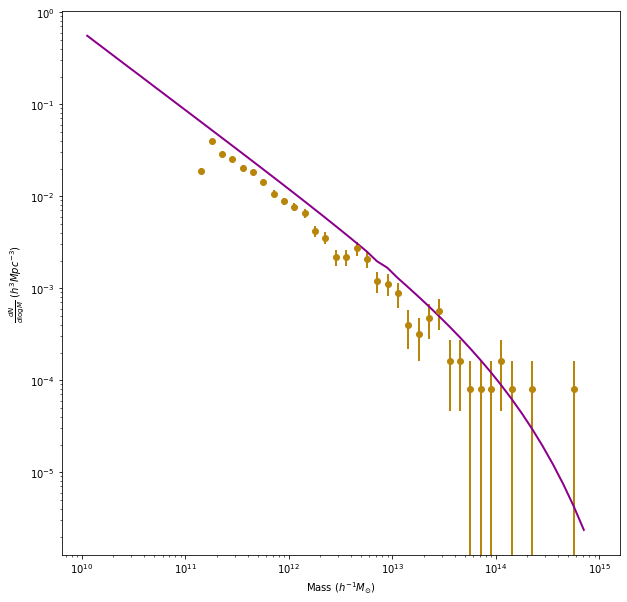

In [16]:
plt.clf()

plt.figure(figsize = (10,10))

plt.errorbar(bin_center, bin_counts, yerr=err, fmt='o', capthick=2, elinewidth=2, color='darkgoldenrod')


plt.plot(m, dn_dlogm, color='darkmagenta', linewidth=2)


plt.ylabel(r'$\frac{dN}{d\logM}$ ($h^{3}Mpc^{-3}$)')


plt.xlabel('Mass ($h^{-1} M_{\odot}$)')


plt.yscale('log', nonposy='clip'); plt.xscale('log')

# The graph is shifted compared to theirs, which may due to the fact I did not initialize the my_cosmology statment